## Final Project Submission

Please fill out:
* Student name: Chepkemoi Mercy
* Student pace: part time 
* Scheduled project review date/time: 5th November 2023,8.00pm
* Instructor name: 
* Blog post URL:


# Microsoft Movie Studio 

   # Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# The Data
We are using movie datasets from 4 different sources:

    * IMDb
    * TheMovieDB
    * Box Office Mojo
    * The Numbers
And the specific files used are as below;

    * imdb.title.basics
    * imdb.title.ratings
    * bom.movie_gross

# Importing libraries and loading data

In [99]:
import pandas as pd # dataframes
import numpy as np # scientific computing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # for readable charts
%matplotlib inline

In [100]:
bom=pd.read_csv('C:/Users/MERCY/Documents/Flatiron/Phase_1_project/bom.movie_gross.csv')
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Checking the columns and data types of the data set


In [101]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [102]:
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

We need to convert the foreign gross to a numeric datatype and first we have to remove ',' which is commonly used to separate values in numbers this is because python interpret thsi as a string and will hinder the conversion to numeric.
    1. Remove the , character from foreign_gross
    2. Convert the column to numeric
    3. Check whether the conversion has been successfull

In [103]:

bom['foreign_gross'].replace(",", "", inplace=True, regex=True) # removes ,

In [104]:

bom=bom.astype({'foreign_gross':float})
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [105]:
bom.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

Checking the null values and dealing with the missing values



In [106]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Noting number of null values in the 'foreign_gross', we can drop this values for the reason that may be the movie was only available locally and therefore replacing would not be a good idea and might to lead misinformation and bad business decision

In [107]:
bom.dropna(subset=['foreign_gross'],inplace=True)

In [108]:
bom.isna().sum()

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

Basics data

    load the data and check the data types
    

In [109]:
basics=pd.read_csv('C:/Users/MERCY/Documents/Flatiron/Phase_1_project/title.basics.csv')
basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [110]:
basics.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [111]:
basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

Ratings data set
    Load the data set ,check data types and and null values

In [112]:
ratings=pd.read_csv('C:/Users/MERCY/Documents/Flatiron/Phase_1_project/title.ratings.csv')
ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [113]:
ratings.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [114]:
ratings.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

         Merging dataframes
For better utilization and analysis of the data, ratings dataframeand basics dataframe are merged utilizing the 'tconst' column

In [115]:
basics_and_ratings=pd.merge(basics, ratings, on='tconst')
basics_and_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [116]:
basics_and_ratings.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [117]:
basics_and_ratings.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Merging the dataframes reduce the number of null values in basics dataframe.



In [118]:
#dropping the null values
new_basics_and_ratings=basics_and_ratings.dropna()

In [119]:
new_basics_and_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [120]:
new_basics_and_ratings.isnull().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [121]:
new_basics_and_ratings.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

# Data visualization
In this section we get to drawing insights from the dataframes that will help Microsoft in there intention to create movie studio.

In [234]:
#Grouping the data by genres and sorting them the numvotes
new_basics_and_ratings = new_basics_and_ratings.groupby('genres').sum().sort_values('numvotes', ascending=False).iloc[:10]
new_basics_and_ratings

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Action,Adventure,Sci-Fi",247789,13354.0,697.2,23023053
"Action,Adventure,Fantasy",201449,10832.0,533.6,9658805
"Adventure,Animation,Comedy",471471,20697.0,1391.0,8687201
Drama,20523324,994790.0,66083.6,8342370
"Comedy,Drama,Romance",2334175,116382.0,7288.8,7662618
"Action,Adventure,Comedy",483562,23444.0,1322.3,7256271
Comedy,9273933,442849.0,26636.4,6763496
"Comedy,Drama",4937112,241497.0,15610.2,6449680
"Action,Crime,Drama",1067507,55628.0,3168.5,5561662


In [199]:
# Extracting 'genres' and 'averagerating' for visualization
genres_averating=new_basics_and_ratings.loc[:,['averagerating']].groupby('genres').sum().sort_values('averagerating',ascending=False)
genres_averagerating=genres_averating.reset_index()
genres_averagerating

,genres,averagerating
0,Drama,66083.6
1,Comedy,26636.4
2,"Comedy,Drama",15610.2
3,"Drama,Romance",8730.2
4,"Comedy,Drama,Romance",7288.8
5,"Action,Crime,Drama",3168.5
6,"Adventure,Animation,Comedy",1391.0
7,"Action,Adventure,Comedy",1322.3
8,"Action,Adventure,Sci-Fi",697.2
9,"Action,Adventure,Fantasy",533.6


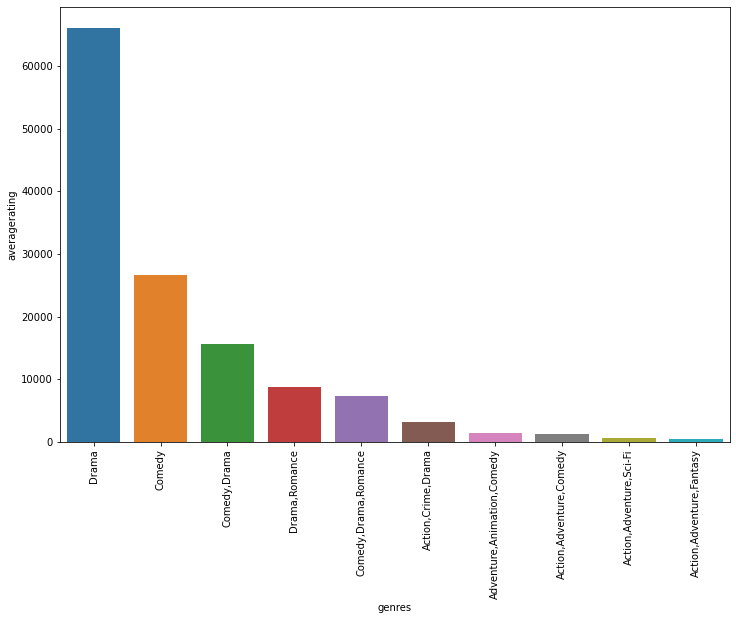

In [215]:
#Seaborn barplot
plt.figure(figsize=(12,8))
sns.barplot(x=genres_averagerating['genres'], 
            y=genres_averagerating['averagerating'])

plt.xticks(rotation=90)          
                        
plt.show()


The graph shows how various film genres are rated.

In [185]:
#Extracting 'numvotes' and 'genres'
genres_numvotes=new_basics_and_ratings.loc[:,['numvotes']].groupby('genres').sum().sort_values('numvotes',ascending=False)
genres_numvotes

,numvotes
genres,
"Action,Adventure,Sci-Fi",23023053
"Action,Adventure,Fantasy",9658805
"Adventure,Animation,Comedy",8687201
Drama,8342370
"Comedy,Drama,Romance",7662618
"Action,Adventure,Comedy",7256271
Comedy,6763496
"Comedy,Drama",6449680
"Action,Crime,Drama",5561662


In [187]:
new_genres_numvotes=genres_numvotes.reset_index()
new_genres_numvotes

,genres,numvotes
0,"Action,Adventure,Sci-Fi",23023053
1,"Action,Adventure,Fantasy",9658805
2,"Adventure,Animation,Comedy",8687201
3,Drama,8342370
4,"Comedy,Drama,Romance",7662618
5,"Action,Adventure,Comedy",7256271
6,Comedy,6763496
7,"Comedy,Drama",6449680
8,"Action,Crime,Drama",5561662
9,"Drama,Romance",5532458


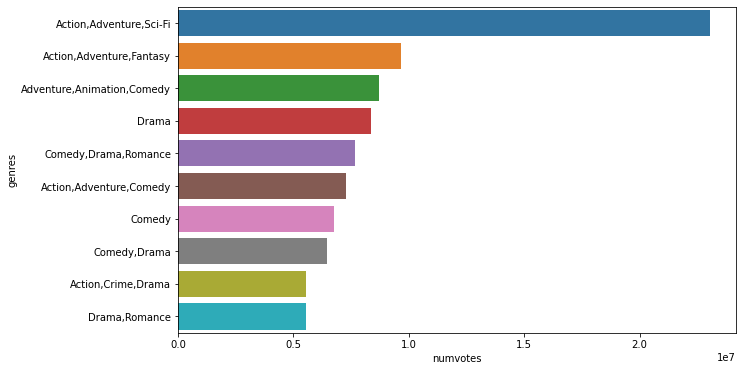

In [216]:
plt.figure(figsize=(10,6))
sns.barplot(x=new_genres_numvotes['numvotes'], 
            y=new_genres_numvotes['genres'].iloc[:10],
            ci=False
            
                        )
plt.show()


The graph shows the number of votes per film genre.

In [219]:
# Extracting data from the dataframe
numvotes_runtime_minutes=new_basics_and_ratings.loc[:,['numvotes','runtime_minutes']]
numvotes_runtime_minutes

,numvotes,runtime_minutes
genres,,
"Action,Adventure,Sci-Fi",23023053,13354.0
"Action,Adventure,Fantasy",9658805,10832.0
"Adventure,Animation,Comedy",8687201,20697.0
Drama,8342370,994790.0
"Comedy,Drama,Romance",7662618,116382.0
"Action,Adventure,Comedy",7256271,23444.0
Comedy,6763496,442849.0
"Comedy,Drama",6449680,241497.0
"Action,Crime,Drama",5561662,55628.0


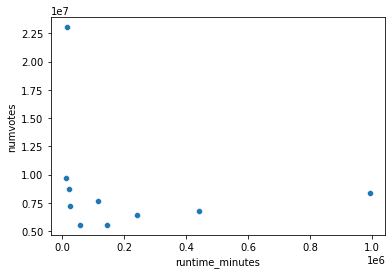

In [223]:
# checking correlation between runtime_minutes and numvotes
sns.scatterplot(x="runtime_minutes",
                    y="numvotes",
                    data=numvotes_runtime_minutes)
plt.show()

The graph above shows that there is no correlation between the two variables, runtime_minutes and numvotes

In [226]:
averagerating_runtime_minutes=new_basics_and_ratings.loc[:,['runtime_minutes','averagerating']]
averagerating_runtime_minutes

,runtime_minutes,averagerating
genres,,
"Action,Adventure,Sci-Fi",13354.0,697.2
"Action,Adventure,Fantasy",10832.0,533.6
"Adventure,Animation,Comedy",20697.0,1391.0
Drama,994790.0,66083.6
"Comedy,Drama,Romance",116382.0,7288.8
"Action,Adventure,Comedy",23444.0,1322.3
Comedy,442849.0,26636.4
"Comedy,Drama",241497.0,15610.2
"Action,Crime,Drama",55628.0,3168.5


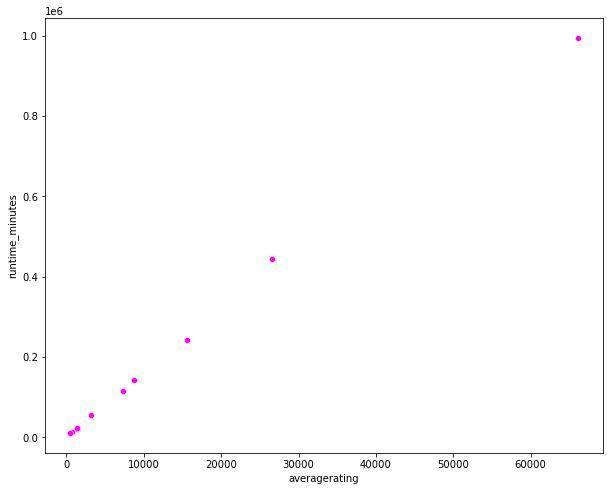

In [229]:
# Plot to check if there is correlation between the averagerating and runtime_minutes
plt.figure(figsize=(10,8))
sns.scatterplot(x="averagerating",
                    y="runtime_minutes",
                color='magenta',
                    data=averagerating_runtime_minutes)
plt.show()

The graph shows that there is a positive correlation between the runtime_minutes and averagerating. That is as the runtime_minutes increases the averagerating also increases.

In [155]:
# Reviewing the movie gross dataframe 
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018
3309,Time Freak,Grindstone,10000.0,256000.0,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018


In [235]:
#Extracting columns from bom data frame
domestic=bom.loc[:,['studio','domestic_gross']].groupby('studio').sum().sort_values('domestic_gross',ascending=False)
domestic

,domestic_gross
studio,
BV,1.839653e+10
Uni.,1.289204e+10
WB,1.212360e+10
Fox,1.092450e+10
Sony,8.459479e+09
...,...
Shout!,5.600000e+03
DR,8.000000e+02
PI,0.000000e+00


In [236]:
domestic_income=domestic.reset_index()
domestic_income

,studio,domestic_gross
0,BV,1.839653e+10
1,Uni.,1.289204e+10
2,WB,1.212360e+10
3,Fox,1.092450e+10
4,Sony,8.459479e+09
...,...,...
170,Shout!,5.600000e+03
171,DR,8.000000e+02
172,PI,0.000000e+00
173,Cdgm.,0.000000e+00


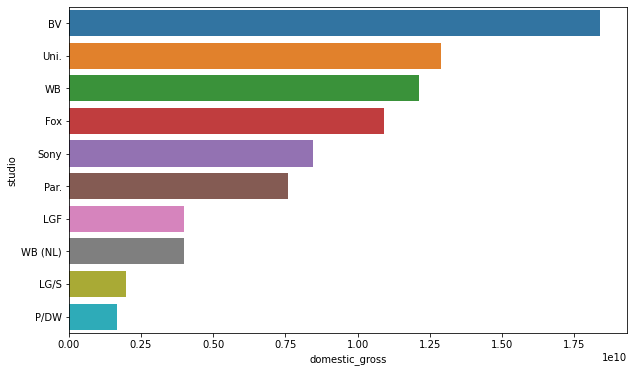

In [237]:
# Plotting a bar graph using seaborn library
plt.figure(figsize=(10,6))
sns.barplot(x=domestic_income['domestic_gross'], 
            y=domestic_income['studio'].iloc[:10],
            ci=False
            
                        )
plt.show()


The graph shows the studios and the domestic gross income

In [189]:
# Extracting columns
foreign_gross_income=bom.loc[:,['studio','foreign_gross']].groupby('studio').sum().sort_values('foreign_gross',ascending=False)
foreign_gross_income

,foreign_gross
studio,
BV,2.579385e+10
Fox,2.005587e+10
WB,1.866790e+10
Uni.,1.685477e+10
Sony,1.394535e+10
...,...
Icar.,1.370000e+04
ITL,1.180000e+04
IVP,9.100000e+03


In [191]:
# reseting index to allow for analysis
foreign_income=foreign_gross_income.reset_index()
foreign_income

,studio,foreign_gross
0,BV,2.579385e+10
1,Fox,2.005587e+10
2,WB,1.866790e+10
3,Uni.,1.685477e+10
4,Sony,1.394535e+10
...,...,...
170,Icar.,1.370000e+04
171,ITL,1.180000e+04
172,IVP,9.100000e+03
173,ICir,6.400000e+03


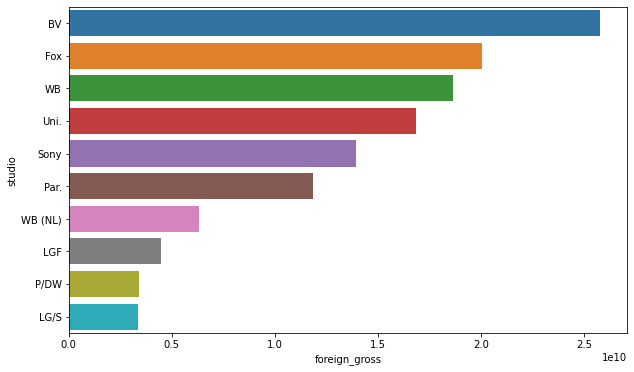

In [218]:
# Plotting a graph using seaborn library
plt.figure(figsize=(10,6))
sns.barplot(x=foreign_income['foreign_gross'], 
            y=foreign_income['studio'].iloc[:10],
            ci=False
            
                        )
plt.show()



The graph shows studios and foreign gross income

# Conclusions 
The analysis leads to the following recommendations for Microsoft
    1. Acquire BV studio- BV studio is the best performing in terms of both foreign and gross income. This will ensure Microsoft picks up well in the creation of the new studio in terms of income.
    2. Film to focus on- Microsoft should focus on creation of Drama films as it has higher average ratings.
    3. Film duration- The film should not be too short 
    
# Futher analysis
Further analysis should done on the studios which has highest domestic and foregn gross income to determine the specific genre type that contributes to the income.
    